In [1]:
%load_ext lab_black
import pandas as pd
import numpy as np
import drnb as nb

In [2]:
import drnb.io as nbio

irisx, irisy = nbio.read_dataxy("iris")

In [3]:
from sklearn.random_projection import SparseRandomProjection

seed = 42
transformer = SparseRandomProjection(n_components=2, random_state=seed)
iris_rp = transformer.fit_transform(irisx)

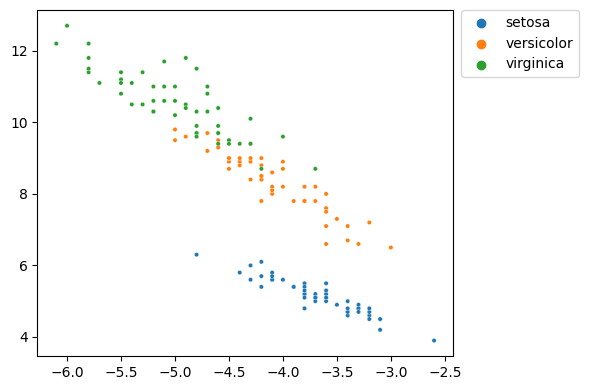

In [4]:
import drnb.plot as nbplot

nbplot.sns_embed_plot(iris_rp, irisy)

Reading/embedding/plotting/writing in one step:

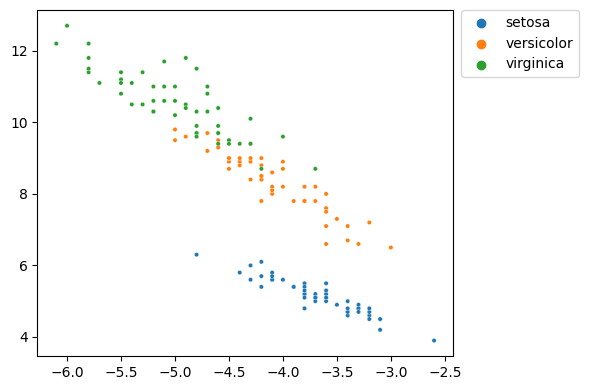

In [6]:
iris_randproj = nb.embed_data(
    name="iris",
    method=("randproj", dict(random_state=42)),
    export=dict(create_sub_dir=True),
)

by setting `create_sub_dir=True`, we will create the `randproj` subdirectory if it doesn't already exist.